## Disclaimer: The dataset has minor modifications for educational purposes.
### This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).
#### Dataset: Novel Corona Virus 2019 Dataset
#### Dataset Description:
#### SNo: Serial Number
#### ObservationDate: Observation date in mm/dd/yyyy
#### Province/State: Province or State
#### Country/Region: Country or region
#### Last Update: Last update date time in UTC
#### Confirmed: Cumulative number of confirmed cases
#### Deaths: Cumulative number of deaths cases
#### Recovered: Cumulative number of recovered cases 
##### *Infected: Confirmed - Recovered – Deaths
 You are a Data Scientist working for the World Health Organization (WHO). Due to the outbreak of 2019-nCoV, WHO is alerted to several cases of pneumonia and wants to know how this virus will affect the population, specifically whether the Healthcare System in place iscapable of addressing this issue. Therefore, you are asked to predict next 7-days 2019-nCoV cumulative Confirmed, Infected, Recovered, Death cases using Linear Regression Model.

In [146]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [147]:
data = pd.read_csv(r'C:\Users\dell\Desktop\Python\week4\day1\covid_19_data.csv')
df = data.copy()
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [148]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6717,6718,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              6722 non-null   int64  
 1   ObservationDate  6722 non-null   object 
 2   Province/State   3953 non-null   object 
 3   Country/Region   6722 non-null   object 
 4   Last Update      6722 non-null   object 
 5   Confirmed        6722 non-null   float64
 6   Deaths           6722 non-null   float64
 7   Recovered        6722 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 420.3+ KB


In [150]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,6722.000000,6722.000000,6722.000000,6722.000000
mean,3361.500000,601.195924,19.855846,226.341267
std,1940.618587,4896.332140,204.486922,2556.035202
min,1.000000,0.000000,0.000000,0.000000
25%,1681.250000,2.000000,0.000000,0.000000
50%,3361.500000,13.000000,0.000000,0.000000
75%,5041.750000,108.000000,1.000000,11.000000
max,6722.000000,67800.000000,3122.000000,56927.000000


In [151]:
df.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     2769
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [152]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [153]:
[col.lower() for col in df.columns]

['sno',
 'observationdate',
 'province/state',
 'country/region',
 'last update',
 'confirmed',
 'deaths',
 'recovered']

In [154]:
df.columns=df.columns.str.lower().str.replace(r'[/ ]', '_', regex=True)
df.rename(columns={'province_state': 'province',
                   'country_region': 'country',
                   'observationdate': 'observation_date'}, inplace=True)

In [155]:
df

,sno,observation_date,province,country,last_update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6717,6718,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0


In [156]:
sorted(df.country.unique())

[' Azerbaijan',
 "('St. Martin',)",
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Channel Islands',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Holy See',
 'Honduras

In [157]:
df['country'].str.lower().str.strip()

0              mainland china
1              mainland china
2              mainland china
3              mainland china
4              mainland china
                ...          
6717                 guernsey
6718                   jersey
6719              puerto rico
6720    republic of the congo
6721               the gambia
Name: country, Length: 6722, dtype: object

In [158]:
def clean_country(country):
    country = country.lower().strip()
    if country == 'mainland china':
        country = 'china'
    return country   

In [159]:
df['country'].apply(clean_country)

0                       china
1                       china
2                       china
3                       china
4                       china
                ...          
6717                 guernsey
6718                   jersey
6719              puerto rico
6720    republic of the congo
6721               the gambia
Name: country, Length: 6722, dtype: object

In [160]:
df

,sno,observation_date,province,country,last_update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6717,6718,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0


In [161]:
df_pure = df.drop(['sno', 'province', 'country', 'last_update'], axis=1)

In [162]:
df_pure

,observation_date,confirmed,deaths,recovered
0,01/22/2020,1.0,0.0,0.0
1,01/22/2020,14.0,0.0,0.0
2,01/22/2020,6.0,0.0,0.0
3,01/22/2020,1.0,0.0,0.0
4,01/22/2020,0.0,0.0,0.0
...,...,...,...,...
6717,03/18/2020,0.0,0.0,0.0
6718,03/18/2020,0.0,0.0,0.0
6719,03/18/2020,0.0,0.0,0.0
6720,03/18/2020,0.0,0.0,0.0


In [163]:
df_pure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  6722 non-null   object 
 1   confirmed         6722 non-null   float64
 2   deaths            6722 non-null   float64
 3   recovered         6722 non-null   float64
dtypes: float64(3), object(1)
memory usage: 210.2+ KB


In [164]:
df_pure.groupby('observation_date').sum()

,confirmed,deaths,recovered
observation_date,,,
01/22/2020,555.0,17.0,28.0
01/23/2020,653.0,18.0,30.0
01/24/2020,941.0,26.0,36.0
01/25/2020,1438.0,42.0,39.0
01/26/2020,2118.0,56.0,52.0
01/27/2020,2927.0,82.0,61.0
01/28/2020,5578.0,131.0,107.0
01/29/2020,6165.0,133.0,126.0
01/30/2020,8235.0,171.0,143.0


In [165]:
df_pure=df_pure.groupby('observation_date').sum().reset_index()
df_pure

,observation_date,confirmed,deaths,recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0
5,01/27/2020,2927.0,82.0,61.0
6,01/28/2020,5578.0,131.0,107.0
7,01/29/2020,6165.0,133.0,126.0
8,01/30/2020,8235.0,171.0,143.0
9,01/31/2020,9925.0,213.0,222.0


In [166]:
df_pure.observation_date = pd.to_datetime(df_pure.observation_date)
df_pure

,observation_date,confirmed,deaths,recovered
0,2020-01-22,555.0,17.0,28.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1438.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0
5,2020-01-27,2927.0,82.0,61.0
6,2020-01-28,5578.0,131.0,107.0
7,2020-01-29,6165.0,133.0,126.0
8,2020-01-30,8235.0,171.0,143.0
9,2020-01-31,9925.0,213.0,222.0


In [167]:
df_pure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  57 non-null     datetime64[ns]
 1   confirmed         57 non-null     float64       
 2   deaths            57 non-null     float64       
 3   recovered         57 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.9 KB


In [168]:
(df_pure.observation_date.max() - df_pure_date_min).days

56

In [169]:
df_pure_date_max = df_pure.observation_date.max()
df_pure_date_min = df_pure.observation_date.min()

def substraction(observation_date):
    return (observation_date - df_pure_date_min).days + 1
    

In [170]:
# df_pure.observation_date.apply(substraction)
df_pure['day_counter'] = df_pure.observation_date.apply(lambda x: substraction(x))
df_pure.drop('observation_date', axis=1, inplace=True)
df_pure

,confirmed,deaths,recovered,day_counter
0,555.0,17.0,28.0,1
1,653.0,18.0,30.0,2
2,941.0,26.0,36.0,3
3,1438.0,42.0,39.0,4
4,2118.0,56.0,52.0,5
5,2927.0,82.0,61.0,6
6,5578.0,131.0,107.0,7
7,6165.0,133.0,126.0,8
8,8235.0,171.0,143.0,9
9,9925.0,213.0,222.0,10


In [171]:
df_pure.head()

,confirmed,deaths,recovered,day_counter
0,555.0,17.0,28.0,1
1,653.0,18.0,30.0,2
2,941.0,26.0,36.0,3
3,1438.0,42.0,39.0,4
4,2118.0,56.0,52.0,5


In [172]:
df_pure['infected'] = df_pure['confirmed'] - df_pure['recovered'] - df_pure['deaths']

In [173]:
df_pure.head()

,confirmed,deaths,recovered,day_counter,infected
0,555.0,17.0,28.0,1,510.0
1,653.0,18.0,30.0,2,605.0
2,941.0,26.0,36.0,3,879.0
3,1438.0,42.0,39.0,4,1357.0
4,2118.0,56.0,52.0,5,2010.0


In [174]:
df_pure = df_pure[['day_counter', 'confirmed', 'deaths', 'recovered', 'infected']]
df_pure.head()

,day_counter,confirmed,deaths,recovered,infected
0,1,555.0,17.0,28.0,510.0
1,2,653.0,18.0,30.0,605.0
2,3,941.0,26.0,36.0,879.0
3,4,1438.0,42.0,39.0,1357.0
4,5,2118.0,56.0,52.0,2010.0


### Confirmed Predcition

In [175]:
x = df_pure[['day_counter']]
y = df_pure['confirmed']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, shuffle=True)

### Modelling

In [176]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
lin_model = model.fit(X_train, y_train)
lin_model

LinearRegression()

### Prediction and Merics

In [177]:
y_pred = lin_model.predict(X_test)

In [178]:
y_pred, y_test

(array([ 46261.36464623,  34011.43396096, 113635.98341524,  64636.26067414,
        -11925.80610882,  58511.2953315 ,  83011.15670205, 132010.87944315,
        119760.94875788,  40136.39930359,  76886.19135942, 150385.77547106]),
 20     44803.0
 16     34392.0
 42     95124.0
 26     73260.0
 1        653.0
 24     69032.0
 32     78985.0
 48    118582.0
 44    101800.0
 18     40151.0
 30     76843.0
 54    181546.0
 Name: confirmed, dtype: float64)

In [179]:
f'intercept: {model.intercept_}, slope :{model.coef_[0]}'

'intercept: -18050.771451461304, slope :3062.4826713186303'

In [180]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
R_pearson = pearsonr(y_test, y_pred)
print('R_pearson=', R_pearson)
R_spearson = spearmanr(y_test, y_pred)
print('R_spearman=', R_spearson)
R2 = r2_score(y_test, y_pred)
print('R_Squared=', R2)
n = X_test.shape[0]
p = X_test.shape[1]
adj_R2 = 1 - (1-R2)*(n-1)/(n-p-1)
print('adjusted R^2=', adj_R2)
MAE = mean_absolute_error(y_test, y_pred)
print("MAE=", MAE)
MSE = mean_squared_error(y_test, y_pred)
print('MSE=', MSE)
RMSE = np.square(MSE)
print("RMSE=", RMSE)

R_pearson= PearsonRResult(statistic=0.9546369396080842, pvalue=1.4016540685591515e-06)
R_spearman= SignificanceResult(statistic=1.0, pvalue=0.0)
R_Squared= 0.9081493592042216
adjusted R^2= 0.8989642951246437
MAE= 9892.347140961212
MSE= 181528979.18849102
RMSE= 3.2952770285215604e+16


In [181]:
y_pred

array([ 46261.36464623,  34011.43396096, 113635.98341524,  64636.26067414,
       -11925.80610882,  58511.2953315 ,  83011.15670205, 132010.87944315,
       119760.94875788,  40136.39930359,  76886.19135942, 150385.77547106])

In [182]:
X_test.iloc[:,0]

20    21
16    17
42    43
26    27
1      2
24    25
32    33
48    49
44    45
18    19
30    31
54    55
Name: day_counter, dtype: int64

In [183]:
model.score(X_test, y_test)

0.9081493592042216

In [184]:
r2_score(y_test, y_pred)

0.9081493592042216

In [185]:
pearsonr(y_test, y_pred)

PearsonRResult(statistic=0.9546369396080842, pvalue=1.4016540685591515e-06)

In [186]:
pearsonr(X_test.iloc[:,0], y_test)

PearsonRResult(statistic=0.9546369396080843, pvalue=1.4016540685591179e-06)

In [187]:
import statsmodels.api as sm

# Statsmodels OLS modelini qurun
X_train_stat = sm.add_constant(X_train)  # Sabit (constant) sütunu əlavə edin
X_test_stat = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_stat).fit()

# Model xülasəsi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              confirmed   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     530.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           8.18e-26
Time:                        12:06:44   Log-Likelihood:                -495.70
No. Observations:                  45   AIC:                             995.4
Df Residuals:                      43   BIC:                             999.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.805e+04   4413.512     -4.090      

In [188]:
import pingouin as pg

# ANOVA testini həyata keçirin
aov = pg.anova(dv='confirmed', between='day_counter', data=df_pure, detailed=True)
print(aov)

        Source            SS  DF            MS  np2
0  day_counter  1.540879e+11  56  2.751570e+09  1.0
1       Within  0.000000e+00   0           NaN  NaN


C:\Users\dell\anaconda3\Lib\site-packages\pingouin\parametric.py:1007: RuntimeWarning: invalid value encountered in scalar divide
  mserror = sserror / ddof2


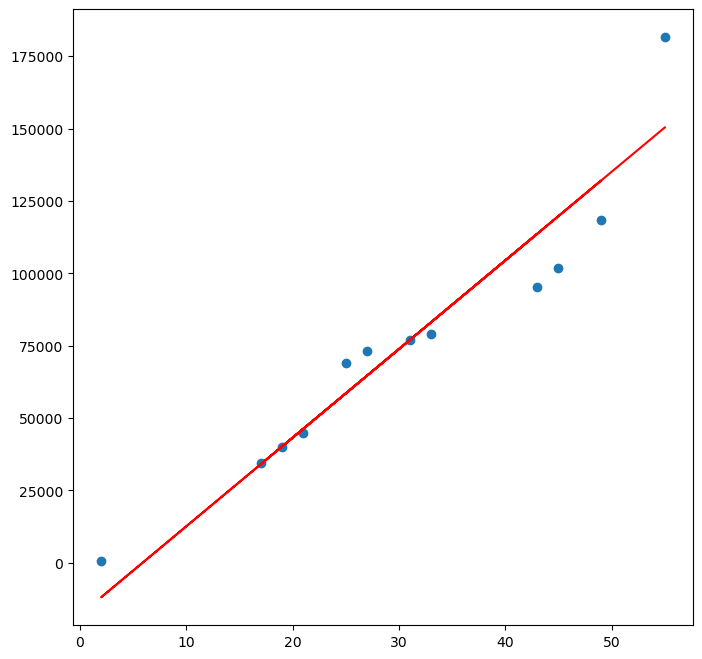

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')

In [193]:
next_7_days = np.array([51, 52, 53, 54, 55, 56, 57])

lin_model.predict(next_7_days.reshape(-1,1))

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([138135.84478579, 141198.32745711, 144260.81012843, 147323.29279974,
       150385.77547106, 153448.25814238, 156510.7408137 ])

### Deaths Prediction

In [195]:
df_pure.head()

,day_counter,confirmed,deaths,recovered,infected
0,1,555.0,17.0,28.0,510.0
1,2,653.0,18.0,30.0,605.0
2,3,941.0,26.0,36.0,879.0
3,4,1438.0,42.0,39.0,1357.0
4,5,2118.0,56.0,52.0,2010.0


intercept: -1073.5612529782857, slope :118.71637354900687
R_pearson= PearsonRResult(statistic=0.9315197854420911, pvalue=1.0564575560949569e-05)
R_spearman= SignificanceResult(statistic=1.0, pvalue=0.0)
R_Squared= 0.862565303753617
adjusted R^2= 0.8488218341289786
MAE= 551.8960403393711
MSE= 468237.2156059365
RMSE= 219246090078.40024


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4980.97379802, 5099.69017157, 5218.40654512, 5337.12291867,
       5455.83929222, 5574.55566577, 5693.27203932])

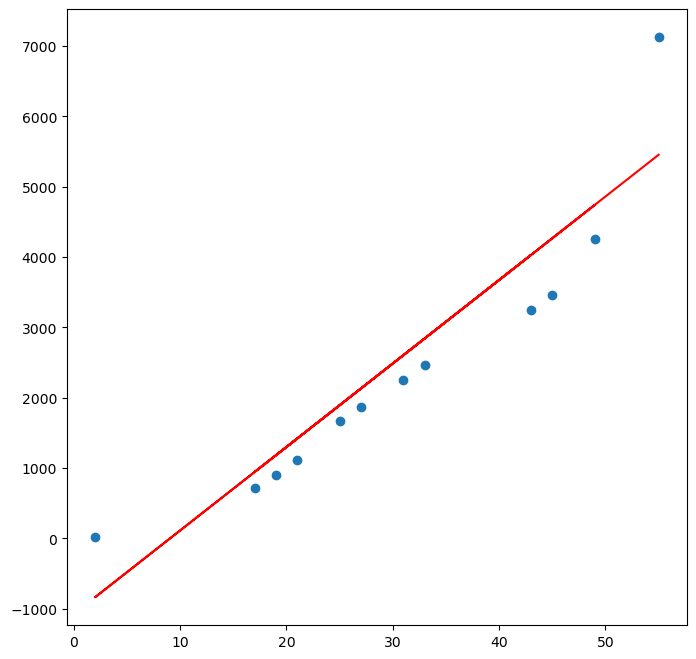

In [203]:
x = df_pure[['day_counter']]
y = df_pure['deaths']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, shuffle=True)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
lin_model = model.fit(X_train, y_train)
lin_model

y_pred = lin_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr

print(f'intercept: {model.intercept_}, slope :{model.coef_[0]}')

R_pearson = pearsonr(y_test, y_pred)
print('R_pearson=', R_pearson)
R_spearson = spearmanr(y_test, y_pred)
print('R_spearman=', R_spearson)
R2 = r2_score(y_test, y_pred)
print('R_Squared=', R2)
n = X_test.shape[0]
p = X_test.shape[1]
adj_R2 = 1 - (1-R2)*(n-1)/(n-p-1)
print('adjusted R^2=', adj_R2)
MAE = mean_absolute_error(y_test, y_pred)
print("MAE=", MAE)
MSE = mean_squared_error(y_test, y_pred)
print('MSE=', MSE)
RMSE = np.square(MSE)
print("RMSE=", RMSE)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')


next_7_days = np.array([51, 52, 53, 54, 55, 56, 57])
lin_model.predict(next_7_days.reshape(-1,1))

### Recovered Prediction

In [206]:
df_pure.head()

,day_counter,confirmed,deaths,recovered,infected
0,1,555.0,17.0,28.0,510.0
1,2,653.0,18.0,30.0,605.0
2,3,941.0,26.0,36.0,879.0
3,4,1438.0,42.0,39.0,1357.0
4,5,2118.0,56.0,52.0,2010.0


intercept: -18404.360841654034, slope :1575.352440026774
R_pearson= PearsonRResult(statistic=0.9417975343840599, pvalue=4.768217169634063e-06)
R_spearman= SignificanceResult(statistic=1.0, pvalue=0.0)
R_Squared= 0.8707546732091535
adjusted R^2= 0.8578301405300688
MAE= 8788.989756344141
MSE= 90873569.84641379
RMSE= 8258005696631046.0


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([61938.61359971, 63513.96603974, 65089.31847976, 66664.67091979,
       68240.02335982, 69815.37579985, 71390.72823987])

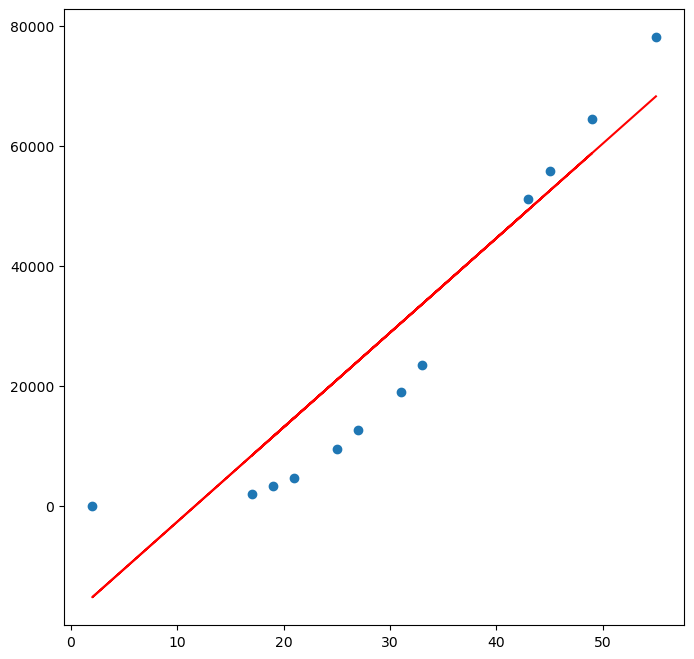

In [208]:
x = df_pure[['day_counter']]
y = df_pure['recovered']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, shuffle=True)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
lin_model = model.fit(X_train, y_train)
lin_model

y_pred = lin_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr

print(f'intercept: {model.intercept_}, slope :{model.coef_[0]}')

R_pearson = pearsonr(y_test, y_pred)
print('R_pearson=', R_pearson)
R_spearson = spearmanr(y_test, y_pred)
print('R_spearman=', R_spearson)
R2 = r2_score(y_test, y_pred)
print('R_Squared=', R2)
n = X_test.shape[0]
p = X_test.shape[1]
adj_R2 = 1 - (1-R2)*(n-1)/(n-p-1)
print('adjusted R^2=', adj_R2)
MAE = mean_absolute_error(y_test, y_pred)
print("MAE=", MAE)
MSE = mean_squared_error(y_test, y_pred)
print('MSE=', MSE)
RMSE = np.square(MSE)
print("RMSE=", RMSE)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')


next_7_days = np.array([51, 52, 53, 54, 55, 56, 57])
lin_model.predict(next_7_days.reshape(-1,1))

### Infected Prediction

In [211]:
df_pure.head()

,day_counter,confirmed,deaths,recovered,infected
0,1,555.0,17.0,28.0,510.0
1,2,653.0,18.0,30.0,605.0
2,3,941.0,26.0,36.0,879.0
3,4,1438.0,42.0,39.0,1357.0
4,5,2118.0,56.0,52.0,2010.0


intercept: 1427.1506431710222, slope :1368.4138577428491
R_pearson= PearsonRResult(statistic=0.7390705068560801, pvalue=0.006026241663603362)
R_spearman= SignificanceResult(statistic=0.6433566433566434, pvalue=0.024003191200713644)
R_Squared= 0.47729610527090516
adjusted R^2= 0.42502571579799564
MAE= 13951.213674016863
MSE= 237295853.22212484
RMSE= 5.6309321956416216e+16


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([71216.25738806, 72584.6712458 , 73953.08510354, 75321.49896128,
       76689.91281903, 78058.32667677, 79426.74053451])

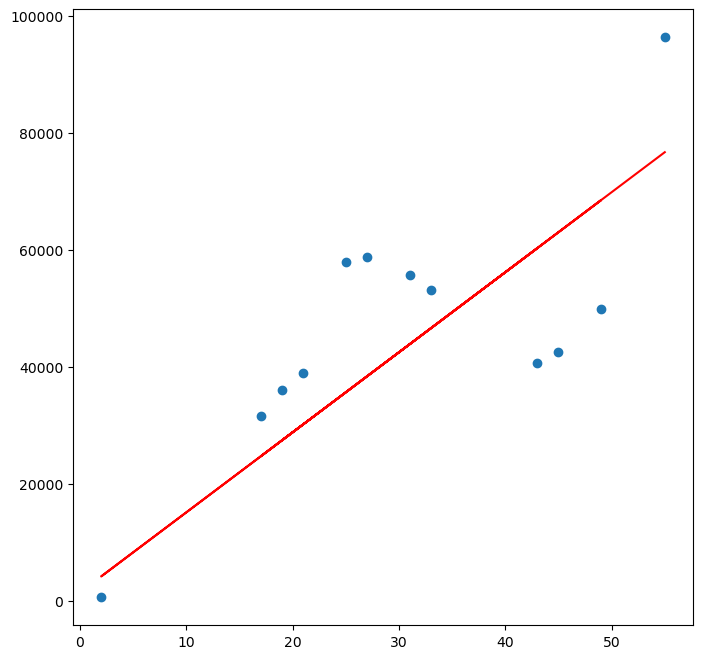

In [212]:
x = df_pure[['day_counter']]
y = df_pure['infected']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, shuffle=True)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
lin_model = model.fit(X_train, y_train)
lin_model

y_pred = lin_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr

print(f'intercept: {model.intercept_}, slope :{model.coef_[0]}')

R_pearson = pearsonr(y_test, y_pred)
print('R_pearson=', R_pearson)
R_spearson = spearmanr(y_test, y_pred)
print('R_spearman=', R_spearson)
R2 = r2_score(y_test, y_pred)
print('R_Squared=', R2)
n = X_test.shape[0]
p = X_test.shape[1]
adj_R2 = 1 - (1-R2)*(n-1)/(n-p-1)
print('adjusted R^2=', adj_R2)
MAE = mean_absolute_error(y_test, y_pred)
print("MAE=", MAE)
MSE = mean_squared_error(y_test, y_pred)
print('MSE=', MSE)
RMSE = np.square(MSE)
print("RMSE=", RMSE)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')


next_7_days = np.array([51, 52, 53, 54, 55, 56, 57])
lin_model.predict(next_7_days.reshape(-1,1))